In [6]:
# Работа с данными
import pandas as pd
# Работа с NaN'ами
import numpy as np
# Графики
import seaborn as sns
# Кодировка признаков
from sklearn.preprocessing import LabelEncoder
# Деление на выборки
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# Градиентный бустинг
from xgboost import XGBClassifier, plot_importance
#Импортируем классификатор

# accuracy_score для отображения точности модели
from sklearn.metrics import accuracy_score

# Регрессор
from xgboost import XGBRegressor

le = LabelEncoder()

%matplotlib inline

In [7]:
data = pd.read_csv("data_22_02_2024.csv")
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3628\1113314663.py:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_22_02_2024.csv")


,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [8]:
data.shape

(403487, 17)

In [9]:
data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

In [10]:
data.isna().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

Отбор признаков

In [11]:
data.drop('furnished', axis=1, inplace=True)
data.drop(['start_date','end_date'], axis=1, inplace=True)

In [12]:
data["total_floor_count"].replace("10-20 arası", 15, inplace = True)
# Заменяем элемнет "10-20 arası" на 15
data["total_floor_count"].replace("20 ve üzeri", 20, inplace = True)
# Заменяем элемент "20 ve üzeri" на 20

In [13]:
data["total_floor_count"].fillna(data["total_floor_count"].median(), inplace = True)
# При помощи fillna заменяем NaN'ы на медиану столбца
data["total_floor_count"] = data["total_floor_count"].astype("int64")
# Преобразуем столбец в тип данных int64

In [14]:
data['building_age'] = le.fit_transform(data['building_age'].astype(str))

In [15]:
data.drop('floor_no', axis=1, inplace=True)

In [16]:
qt_high = data['size'].quantile(0.90)
qt_low = data['size'].quantile(0.10)

In [17]:
data_new = data[data['size'] < qt_high]
data_new = data_new[data_new['size'] > qt_low]

In [18]:
data_new['size'].max()

184.0

In [19]:
data_new.isna().sum()

id                       0
type                     0
sub_type                 0
listing_type             0
tom                      0
building_age             0
total_floor_count        0
room_count               0
size                     0
address                  0
heating_type         10060
price                   87
price_currency          87
dtype: int64

In [20]:
data_new['heating_type'].value_counts()

heating_type
Kombi (Doğalgaz)                   108393
Klima                               34552
Merkezi Sistem (Isı Payı Ölçer)     15281
Merkezi Sistem                      11682
Kalorifer (Doğalgaz)                 6454
Soba (Kömür)                         4470
Yerden Isıtma                        2934
Yok                                  2896
Kat Kaloriferi                       2827
Kombi (Elektrikli)                   1792
Soba (Doğalgaz)                      1489
Güneş Enerjisi                        875
Jeotermal                             779
Kalorifer (Kömür)                     738
Kalorifer (Akaryakıt)                 183
Fancoil                               157
Name: count, dtype: int64

In [21]:
data_new['heating_type'].fillna('Kombi (Doğalgaz)', inplace = True) # Заменяем пропуски на самое частое значение
data_new['heating_type'] = le.fit_transform(data_new['heating_type']) # Кодируем переменную

In [22]:
data_new["price"].fillna(data_new["price"].median(), inplace = True) # Куча выбросов. Заменяем наны медианой

In [23]:
data_new["price_currency"].value_counts()

price_currency
TRY    205016
EUR       201
GBP       200
USD        58
Name: count, dtype: int64

In [24]:
data_new['price_currency'].fillna('TRY', inplace = True) # Заменяем наны самым частым значением
data_new['price_currency'] = le.fit_transform(data_new['price_currency']) # Кодируем параметры

In [25]:
data_new.drop('type', axis=1, inplace=True) # Имеет только одно значение, выкидываем

In [26]:
data_new['sub_type'] = le.fit_transform(data_new['sub_type']) # Кодируем параметры

In [27]:
data_new["listing_type"].value_counts() # Всего 3 уникальных значения - оставляем

listing_type
1    148252
2     56621
3       689
Name: count, dtype: int64

In [28]:
data_new["tom"].value_counts() # 181 уникальное значение, не трогаем

tom
30     44022
60     11378
0       5764
90      4605
61      3498
       ...  
164       31
174       30
177       26
171       17
178        7
Name: count, Length: 181, dtype: int64

In [29]:
data_new["room_count"] = le.fit_transform(data_new["room_count"]) # Кодируем параметры, так как состоит из строк

In [30]:
data_new.drop("id", axis = 1, inplace = True) # Не поможет при обучении модели, поэтому просто выкидываем

In [31]:
data_new['address'].value_counts()

address
Balıkesir/Edremit/Akçay              3427
İstanbul/Beylikdüzü/Cumhuriyet       2160
Aydın/Didim/Efeler                   2121
İstanbul/Başakşehir/Kayabaşı         1298
İstanbul/Bahçelievler/Siyavuşpaşa    1188
                                     ... 
Karaman/Merkez/Yenişehir                1
Adıyaman/Kahta/Karşıyaka                1
Bursa/Mustafakemalpaşa/Barış            1
Hatay/İskenderun/Meydan                 1
Samsun/Bafra/Hacınabi                   1
Name: count, Length: 6240, dtype: int64

In [32]:
data_new.drop('address', axis=1, inplace=True)

In [33]:
data_new.head()

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency
0,7,2,30,0,20,5,90.0,0,3500.0,2
4,7,1,30,0,20,5,90.0,0,1450000.0,2
6,0,2,54,0,20,7,160.0,0,3750.0,2
8,0,1,11,14,2,7,140.0,0,1500000.0,2
10,5,1,13,0,1,7,125.0,0,2450000.0,2


In [34]:
df = data_new

Разделение на обучающую и тестовую выборку

In [35]:
# Создаем матрицу ответов
x = df.drop('building_age', axis=1) # Выборка обучающая, выбрасываем тот столбец, который будем предсказывать. Axis = 1 - это чтобы столбец выбросило
y = df['building_age'] # Тестовая выборка

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [37]:
xgb_cls = XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state=1)
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
y_pred = xgb_cls.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred)) # Смотрим текстовый отчёт по показателям классификации

              precision    recall  f1-score   support

           0       0.45      0.92      0.61     22403
           1       0.54      0.04      0.08      2948
           2       0.29      0.13      0.18      4970
           3       0.27      0.20      0.23      5275
           4       0.48      0.04      0.07      2516
           5       0.29      0.10      0.14      3232
           6       0.31      0.09      0.14      1794
           7       0.47      0.03      0.06      2153
           8       0.34      0.08      0.13       732
           9       0.48      0.07      0.12       204
          10       0.45      0.03      0.06      2556
          11       0.35      0.15      0.21       119
          12       0.53      0.03      0.05      1996
          13       0.29      0.17      0.22      7755
          14       0.37      0.37      0.37      3016

    accuracy                           0.42     61669
   macro avg       0.39      0.16      0.18     61669
weighted avg       0.39   

In [40]:
print(accuracy_score(y_pred, y_test)) # Так-же мы можем воспользоваться accuracy_score для отображения точности модели

0.41531401514537286


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

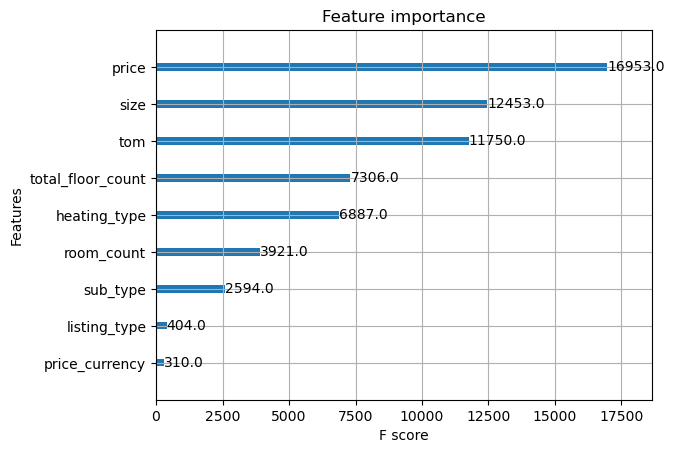

In [41]:
# Отберём признаки с помощью алгоритма и нарисуем график важности, 
# чтобы определить силу влияния признаков(столбцов) на классификацию
plot_importance(xgb_cls)

In [42]:
df_n = df.drop(["price_currency", "listing_type"], axis = 1)
X = df_n.drop("building_age", axis = 1)
y = df_n["building_age"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
xgb_cls = XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state=1)

In [45]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
y_pred = xgb_cls.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.91      0.61     22403
           1       0.53      0.04      0.07      2948
           2       0.29      0.13      0.18      4970
           3       0.27      0.20      0.23      5275
           4       0.48      0.03      0.06      2516
           5       0.30      0.10      0.15      3232
           6       0.30      0.09      0.14      1794
           7       0.42      0.03      0.06      2153
           8       0.33      0.07      0.12       732
           9       0.42      0.06      0.11       204
          10       0.45      0.04      0.07      2556
          11       0.41      0.13      0.19       119
          12       0.47      0.02      0.04      1996
          13       0.29      0.18      0.22      7755
          14       0.37      0.37      0.37      3016

    accuracy                           0.42     61669
   macro avg       0.39      0.16      0.17     61669
weighted avg       0.39   

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

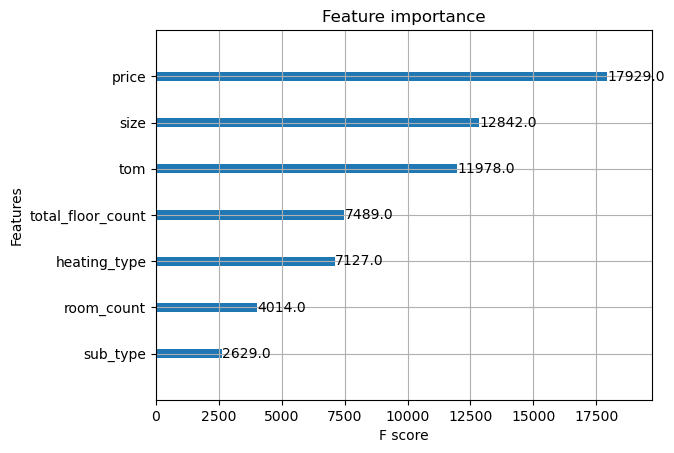

In [48]:
plot_importance(xgb_cls)

<Axes: >

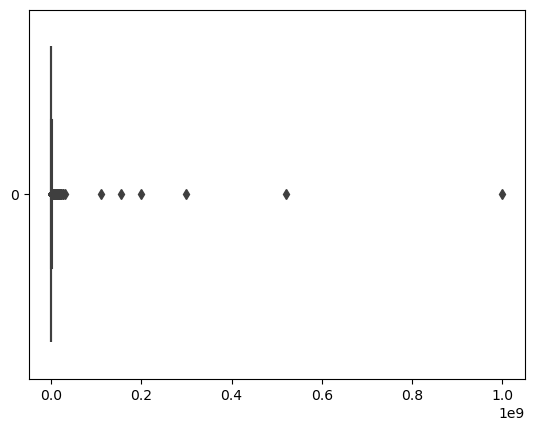

In [49]:
sns.boxplot(df.price, orient="h")

In [50]:
quant = df["price"].quantile(0.6)# считаем квантиль 90 %
quant_low = df["price"].quantile(0.01)# считаем квантиль 10 %
df2 = df[df["price"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["price"] > quant_low] # убираем выбросы по квантилю

<Axes: >

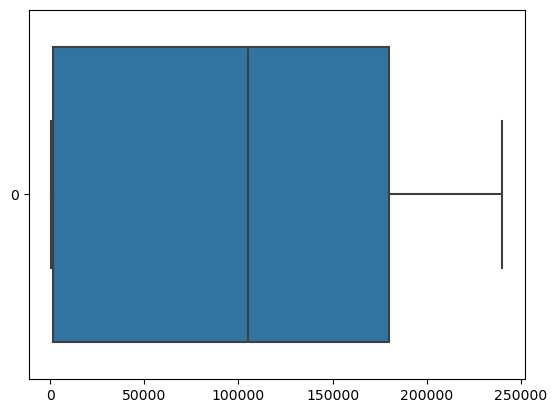

In [51]:
sns.boxplot(df2.price, orient="h")

In [52]:
X = df2.drop("price", axis = 1) #Удаляем столбец с выборкой ответо из основного df
y = df2["price"] #Создаём выборку ответов

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
xgb_regr = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, n_jobs = -1, random_state = 1)

In [55]:
xgb_regr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=1, ...)

In [56]:
y_pred = xgb_regr.predict(x_test)

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

27780.503763261404

In [58]:
r2_score(y_test, y_pred)

0.9052275243112842